In [2]:
import time
import numpy as np
import pandas as pd
import shogun as sg

def saveInfo(name, my_time, my_acc, my_F1, my_precision, my_recall, timeDict, accDict, F1Dict, precisionDict, recallDict):
	timeDict[name] = my_time
	accDict[name] = my_acc
	F1Dict[name]= my_F1
	precisionDict[name] = my_precision
	recallDict[name] = my_recall
	# print("---{}: {} seconds ---".format (name, my_time))
	# print('{}, {} accuracy score: {}, F1-score: {}'.format(title, name, accuracy_score, my_F1))

def evaluateAndSave(name, train_time, features_test, labels_test, labels_predict, timeDict, accDict, F1Dict, precisionDict, recallDict):
	acc = sg.AccuracyMeasure().evaluate(labels_predict, labels_test)
	f1 = sg.F1Measure().evaluate(labels_predict, labels_test)
	prec = sg.PrecisionMeasure().evaluate(labels_predict, labels_test)
	rec = sg.RecallMeasure().evaluate(labels_predict, labels_test)
	print('Accuracy:', acc)
	print('F1:', f1)
	print('Precision:', prec)
	print('Recall:', rec)
	saveInfo(name, train_time, acc, f1, prec, rec, timeDict, accDict, F1Dict, precisionDict, recallDict)


train_data_source = './exercise_data/human_dna_train_split_5_95.csv'
test_data_source = './exercise_data/human_dna_test_split.csv'

train_df = pd.read_csv(train_data_source, header=0)
test_df = pd.read_csv(test_data_source, header=0)

train_seq = train_df['sequences']
train_label = train_df['labels']
test_seq = test_df['sequences']
test_label = test_df['labels']

train_seq = np.array(train_seq)
train_label = np.array(train_label)
test_seq = np.array(test_seq)
test_label = np.array(test_label)

print('train_seq shape:', train_seq.shape)
print('test_seq shape:', test_seq.shape)

timeDict = {}
accDict = {}
F1Dict = {}
precisionDict = {}
recallDict = {}

features_train = sg.StringCharFeatures(train_seq.tolist(), sg.DNA)
features_test = sg.StringCharFeatures(test_seq.tolist(), sg.DNA)
labels_train = sg.BinaryLabels(train_label)
labels_test = sg.BinaryLabels(test_label)

# SVM
C = 1.0
epsilon = 0.001

train_seq shape: (29420,)
test_seq shape: (33333,)


In [17]:
svm = sg.LibSVM(C, sg.WeightedDegreeStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("WeightedDegreeStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Training with WeightedDegreeStringKernel...
Accuracy: 0.996189961899619
F1: 0.2111801242236025
Precision: 0.2982456140350877
Recall: 0.16346153846153846


In [10]:
svm = sg.LibSVM(C, sg.WeightedDegreePositionStringKernel(features_train, features_train, 20), labels_train)
svm.set_epsilon(epsilon)
svm.set_batch_computation_enabled(True)
start = time.time()
svm.train()
evaluateAndSave("WeightedDegreePositionStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.996819968199682
F1: 0.07017543859649122
Precision: 0.4
Recall: 0.038461538461538464


In [23]:
svm = sg.LibSVM(C, sg.PolyMatchStringKernel(features_train, features_train, 5, True), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("PolyMatchStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.996879968799688
F1: 0.0
Precision: nan
Recall: 0.0


In [24]:
svm = sg.LibSVM(C, sg.FixedDegreeStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("FixedDegreeStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.996879968799688
F1: 0.0
Precision: nan
Recall: 0.0


In [28]:
svm = sg.LibSVM(C, sg.LinearStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("LinearStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.975609756097561
F1: 0.004895960832313341
Precision: 0.002805049088359046
Recall: 0.019230769230769232


In [ ]:
svm = sg.LibSVM(C, sg.LocalAlignmentStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("LocalAlignmentStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

In [11]:
svm = sg.LibSVM(C, sg.LocalityImprovedStringKernel(features_train, features_train, 10, 5, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("LocalityImprovedStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.996879968799688
F1: 0.0
Precision: nan
Recall: 0.0


In [ ]:
svm = sg.LibSVM(C, sg.GaussianMatchStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("GaussianMatchStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

In [ ]:
svm = sg.LibSVM(C, sg.CommUlongStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("CommUlongStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

In [4]:
svm = sg.LibSVM(C, sg.CommWordStringKernel(features_train, features_train, False, 10), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("CommWordStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_CommWordStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CCommWordStringKernel::CCommWordStringKernel()
    shogun::CCommWordStringKernel::CCommWordStringKernel(int32_t,bool)
    shogun::CCommWordStringKernel::CCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool,int32_t)
    shogun::CCommWordStringKernel::CCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool)
    shogun::CCommWordStringKernel::CCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *)


In [9]:
svm = sg.LibSVM(C, sg.MatchWordStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("MatchWordStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_MatchWordStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CMatchWordStringKernel::CMatchWordStringKernel()
    shogun::CMatchWordStringKernel::CMatchWordStringKernel(int32_t,int32_t)
    shogun::CMatchWordStringKernel::CMatchWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,int32_t)


In [8]:
svm = sg.LibSVM(C, sg.SimpleLocalityImprovedStringKernel(features_train, features_train, 10, 5, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("SimpleLocalityImprovedStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.996879968799688
F1: 0.0
Precision: nan
Recall: 0.0


In [7]:
svm = sg.LibSVM(C, sg.SNPStringKernel(features_train, features_train, 5, 10, True), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("SNPStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

SystemError: [1;31m[ERROR][0m In file /feedstock_root/build_artefacts/shogun-cpp_1512688880429/work/shogun-shogun_6.1.3/src/shogun/kernel/string/SNPStringKernel.cpp line 133: alen (398) !=m_str_len (0)


In [6]:
svm = sg.LibSVM(C, sg.WeightedCommWordStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("WeightedCommWordStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_WeightedCommWordStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel()
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(int32_t,bool)
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool,int32_t)
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool)
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *)


In [5]:
svm = sg.LibSVM(C, sg.SparseSpatialSampleStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("SparseSpatialSampleStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

SystemError: [1;31m[ERROR][0m In file /feedstock_root/build_artefacts/shogun-cpp_1512688880429/work/shogun-shogun_6.1.3/src/shogun/kernel/string/SparseSpatialSampleStringKernel.cpp line 377: t out of range - shouldn't happen


In [ ]:
svm = sg.LibSVM(C, sg.OligoStringKernel(features_train, features_train, 10, 8), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("OligoStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

In [8]:
timeDict

{'WeightedDegreePositionStringKernel': 70.11102628707886}

In [22]:
labels_predict.scores_to_probabilities()
labels_values = labels_predict.get_values()

..... PR Curve ......


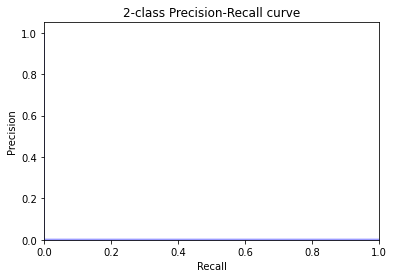

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

print("..... PR Curve ......")
precision, recall, _ = precision_recall_curve(test_label, labels_values)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()